<a href="https://colab.research.google.com/github/letlimaa/Benchmark_WC/blob/main/LapesWC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

In [ ]:
!pip install pyspark raster2xyz

In [ ]:
from pyspark.sql import SparkSession
import os
import time
import matplotlib.pyplot as plt
spark = SparkSession.builder.master('local[*]').getOrCreate()

In [ ]:
num = 32

In [ ]:
def bench(arquivo):
    start_time = time.time()
    df = spark.read.format("csv").option("header", True).load(arquivo)
    df.write.format("noop").mode("overwrite").save()
    end_time = time.time()
    return end_time - start_time

In [ ]:
def tamanho_arquivo(arquivo):
  arquivo_tam= os.path.getsize(arquivo)
  return {
        "Tamanho do arquivo: bytes": arquivo_tam,
        "MB": arquivo_tam / (1024 * 1024),
        "GB": arquivo_tam / (1024 * 1024 * 1024)
    }

In [ ]:
def particao(arquivo):
  df = spark.read.format("csv").option("header", True).load(arquivo)
  return{f"numero de particoes -> {df.rdd.getNumPartitions()}"}

In [ ]:
def plot_time_percentage(arquivos):
    times = []
    total_time = 0

    for arquivo in arquivos:
        time_taken = bench(arquivo)
        times.append(time_taken)
        total_time += time_taken

    percentages = [(time / total_time) * 100 for time in times]

    plt.figure(figsize=(10, 6))
    plt.bar(arquivos, percentages, color='skyblue')
    plt.xlabel('File')
    plt.ylabel('% Time')
    plt.title('Percentage Time Taken for Processing Each File')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_time_percentage2(arquivos):
    times = []
    total_time = 0

    for arquivo in arquivos:
        time_taken = bench(arquivo)
        times.append(time_taken)
        total_time += time_taken

    percentages = [(time / total_time) * 100 for time in times]

    plt.figure(figsize=(10, 6))
    plt.plot(arquivos, percentages, marker='o', color='skyblue', linestyle='-')
    plt.xlabel('File')
    plt.ylabel('% Time')
    plt.title('Percentage Time Taken for Processing Each File')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_stacked_bar(arquivos):
    plt.figure(figsize=(10, 6))

    total_times = []
    percentages_list = []

    for arquivo in arquivos:
        times = []
        time_taken = bench(arquivo)
        times.append(time_taken)

        total_time = sum(times)
        total_times.append(total_time)

        percentages = [(time / total_time) * 100 for time in times]
        percentages_list.append(percentages)

    bottoms = None
    for i, percentages in enumerate(percentages_list):
        if i == 0:
            plt.bar("Total Time", total_times[i], label=arquivos[i])
            bottoms = total_times[i]
        else:
            plt.bar("Total Time", total_times[i], bottom=bottoms, label=arquivos[i])
            bottoms += total_times[i]

    plt.xlabel('Total Time')
    plt.ylabel('Percentage Time')
    plt.title('Stacked Bar Chart of Total Time with Percentage Time for Each File')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_pie_chart(arquivos):
    total_times = []
    percentages = []

    for arquivo in arquivos:
        time_taken = bench(arquivo)
        total_times.append(time_taken)

    total_time = sum(total_times)
    percentages = [(time / total_time) * 100 for time in total_times]

    plt.figure(figsize=(8, 8))
    plt.pie(percentages, labels=arquivos, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Time Taken by Each File')
    plt.axis('equal')
    plt.show()

# **Temperatura média**

# **10min**

In [ ]:
%%capture
!wget https://biogeo.ucdavis.edu/data/worldclim/v2.1/base/wc2.1_10m_tavg.zip
!unzip -o wc2.1_10m_tavg.zip

In [ ]:
!raster2xyz wc2.1_10m_tavg_01.tif wc2.1_10m_tavg_01.csv

[2024-05-04 10:07:08 - INFO] - Getting geotransform and data...
[2024-05-04 10:07:08 - INFO] - Getting XYZ data...
[2024-05-04 10:07:09 - INFO] - Getting geotransformed coordinates...
[2024-05-04 10:07:09 - INFO] - Building XYZ data...
[2024-05-04 10:07:21 - INFO] - New XYZ (csv file) created...


In [ ]:
arquivo='wc2.1_10m_tavg_01.csv'

In [ ]:
tamanho_arquivo(arquivo)

{'Tamanho do arquivo: bytes': 90325443,
 'MB': 86.1410551071167,
 'GB': 0.08412212412804365}

In [ ]:
particao(arquivo)

{'numero de particoes -> 2'}

In [ ]:
for i in range(num):
 %time bench(arquivo)

CPU times: user 35 ms, sys: 3.03 ms, total: 38.1 ms
Wall time: 5.44 s
CPU times: user 20 ms, sys: 4.88 ms, total: 24.9 ms
Wall time: 3.5 s
CPU times: user 20 ms, sys: 1.27 ms, total: 21.2 ms
Wall time: 3.04 s
CPU times: user 19.7 ms, sys: 3.23 ms, total: 22.9 ms
Wall time: 2.94 s
CPU times: user 23.4 ms, sys: 2.66 ms, total: 26.1 ms
Wall time: 3.83 s
CPU times: user 34.7 ms, sys: 1.41 ms, total: 36.1 ms
Wall time: 5.61 s
CPU times: user 37 ms, sys: 2.23 ms, total: 39.3 ms
Wall time: 5.86 s
CPU times: user 27.6 ms, sys: 547 µs, total: 28.1 ms
Wall time: 4.27 s
CPU times: user 17.5 ms, sys: 3.87 ms, total: 21.4 ms
Wall time: 3.07 s
CPU times: user 22.4 ms, sys: 2.93 ms, total: 25.3 ms
Wall time: 3.63 s
CPU times: user 21.6 ms, sys: 3.41 ms, total: 25 ms
Wall time: 3.83 s
CPU times: user 38.5 ms, sys: 2.58 ms, total: 41 ms
Wall time: 6.19 s
CPU times: user 35.3 ms, sys: 3.07 ms, total: 38.3 ms
Wall time: 5.78 s
CPU times: user 27.6 ms, sys: 470 µs, total: 28.1 ms
Wall time: 4.12 s
CPU tim

# **5min**

In [ ]:
%%capture
!wget https://biogeo.ucdavis.edu/data/worldclim/v2.1/base/wc2.1_5m_tavg.zip
!unzip -o wc2.1_5m_tavg.zip

In [ ]:
!raster2xyz wc2.1_5m_tavg_01.tif wc2.1_5m_tavg_01.csv

[2024-05-04 10:10:18 - INFO] - Getting geotransform and data...
[2024-05-04 10:10:18 - INFO] - Getting XYZ data...
[2024-05-04 10:10:18 - INFO] - Getting geotransformed coordinates...
[2024-05-04 10:10:19 - INFO] - Building XYZ data...
[2024-05-04 10:10:59 - INFO] - New XYZ (csv file) created...


In [ ]:
arquivo='wc2.1_5m_tavg_01.csv'

In [ ]:
tamanho_arquivo(arquivo)

{'Tamanho do arquivo: bytes': 363640915,
 'MB': 346.79500102996826,
 'GB': 0.3386669931933284}

In [ ]:
particao(arquivo)

{'numero de particoes -> 3'}

In [ ]:
for i in range(num):
 %time bench(arquivo)

CPU times: user 94.5 ms, sys: 17.4 ms, total: 112 ms
Wall time: 18.5 s
CPU times: user 55.2 ms, sys: 14.8 ms, total: 70 ms
Wall time: 11.9 s
CPU times: user 95.6 ms, sys: 9.88 ms, total: 106 ms
Wall time: 17.4 s
CPU times: user 74.9 ms, sys: 10.6 ms, total: 85.5 ms
Wall time: 14.6 s
CPU times: user 77.5 ms, sys: 9.22 ms, total: 86.7 ms
Wall time: 14.4 s
CPU times: user 89.7 ms, sys: 13.4 ms, total: 103 ms
Wall time: 17.1 s
CPU times: user 62.3 ms, sys: 7.75 ms, total: 70 ms
Wall time: 11.8 s
CPU times: user 91.8 ms, sys: 13.6 ms, total: 105 ms
Wall time: 18.2 s
CPU times: user 72.3 ms, sys: 8 ms, total: 80.3 ms
Wall time: 13.3 s
CPU times: user 83.4 ms, sys: 10.2 ms, total: 93.6 ms
Wall time: 15.8 s
CPU times: user 85.5 ms, sys: 10.9 ms, total: 96.4 ms
Wall time: 16.2 s
CPU times: user 70 ms, sys: 7.21 ms, total: 77.2 ms
Wall time: 12.8 s
CPU times: user 97.8 ms, sys: 9.14 ms, total: 107 ms
Wall time: 18.2 s
CPU times: user 59.4 ms, sys: 10.9 ms, total: 70.3 ms
Wall time: 12.1 s
CPU ti

# **2.5min**

In [ ]:
%%capture
!wget https://biogeo.ucdavis.edu/data/worldclim/v2.1/base/wc2.1_2.5m_tavg.zip
!unzip -o wc2.1_2.5m_tavg.zip

In [ ]:
!raster2xyz wc2.1_2.5m_tavg_01.tif wc2.1_2.5m_tavg_01.csv

[2024-05-04 10:20:13 - INFO] - Getting geotransform and data...
[2024-05-04 10:20:15 - INFO] - Getting XYZ data...
[2024-05-04 10:20:16 - INFO] - Getting geotransformed coordinates...
[2024-05-04 10:20:18 - INFO] - Building XYZ data...
[2024-05-04 10:22:59 - INFO] - New XYZ (csv file) created...


In [ ]:
arquivo='wc2.1_2.5m_tavg_01.csv'

In [ ]:
tamanho_arquivo(arquivo)

{'Tamanho do arquivo: bytes': 1475073804,
 'MB': 1406.7400016784668,
 'GB': 1.3737695328891277}

In [ ]:
particao(arquivo)

{'numero de particoes -> 11'}

In [ ]:
for i in range(num):
 %time bench(arquivo)

CPU times: user 314 ms, sys: 45.2 ms, total: 360 ms
Wall time: 1min 1s
CPU times: user 319 ms, sys: 41.6 ms, total: 361 ms
Wall time: 1min 1s
CPU times: user 467 ms, sys: 55.4 ms, total: 522 ms
Wall time: 1min 5s
CPU times: user 316 ms, sys: 34.9 ms, total: 351 ms
Wall time: 59.9 s
CPU times: user 323 ms, sys: 37.3 ms, total: 360 ms
Wall time: 1min 1s
CPU times: user 304 ms, sys: 40.5 ms, total: 344 ms
Wall time: 58.9 s
CPU times: user 292 ms, sys: 36.5 ms, total: 329 ms
Wall time: 57.5 s
CPU times: user 332 ms, sys: 44.9 ms, total: 377 ms
Wall time: 1min 2s
CPU times: user 327 ms, sys: 35.9 ms, total: 363 ms
Wall time: 1min
CPU times: user 309 ms, sys: 35.6 ms, total: 344 ms
Wall time: 58.1 s
CPU times: user 324 ms, sys: 41.9 ms, total: 366 ms
Wall time: 1min 1s
CPU times: user 325 ms, sys: 47.9 ms, total: 373 ms
Wall time: 1min 2s
CPU times: user 398 ms, sys: 51.6 ms, total: 450 ms
Wall time: 1min 3s
CPU times: user 326 ms, sys: 47.8 ms, total: 374 ms
Wall time: 1min 1s
CPU times: us

# **30s**

In [ ]:
%%capture
!wget https://biogeo.ucdavis.edu/data/worldclim/v2.1/base/wc2.1_30s_tavg.zip
!unzip -o wc2.1_30s_tavg.zip

In [ ]:
!raster2xyz wc2.1_30s_tavg_01.tif wc2.1_30s_tavg_01.csv

[2024-05-04 09:55:06 - INFO] - Getting geotransform and data...
ERROR 4: wc2.1_30s_tavg_01.tif: No such file or directory
[2024-05-04 09:55:06 - ERROR] - Error getting geotransform and data: 'NoneType' object has no attribute 'GetRasterBand'
Traceback (most recent call last):
  File "/usr/local/bin/raster2xyz", line 29, in <module>
    raster2xyz.cli.run()
  File "/usr/local/lib/python3.10/dist-packages/raster2xyz/cli.py", line 39, in run
    rtxyz.translate(input_raster, out_csv)
  File "/usr/local/lib/python3.10/dist-packages/raster2xyz/raster2xyz.py", line 131, in translate
    gtr, raster_values = self.__getRasterData(input_raster, n_band)
TypeError: cannot unpack non-iterable NoneType object


In [ ]:
arquivo='wc2.1_30s_tavg_01.csv'

In [ ]:
tamanho_arquivo(arquivo)

In [ ]:
particao(arquivo)

In [ ]:
for i in range(num):
 %time bench(arquivo)

# **Gráficos bestinhas :P**

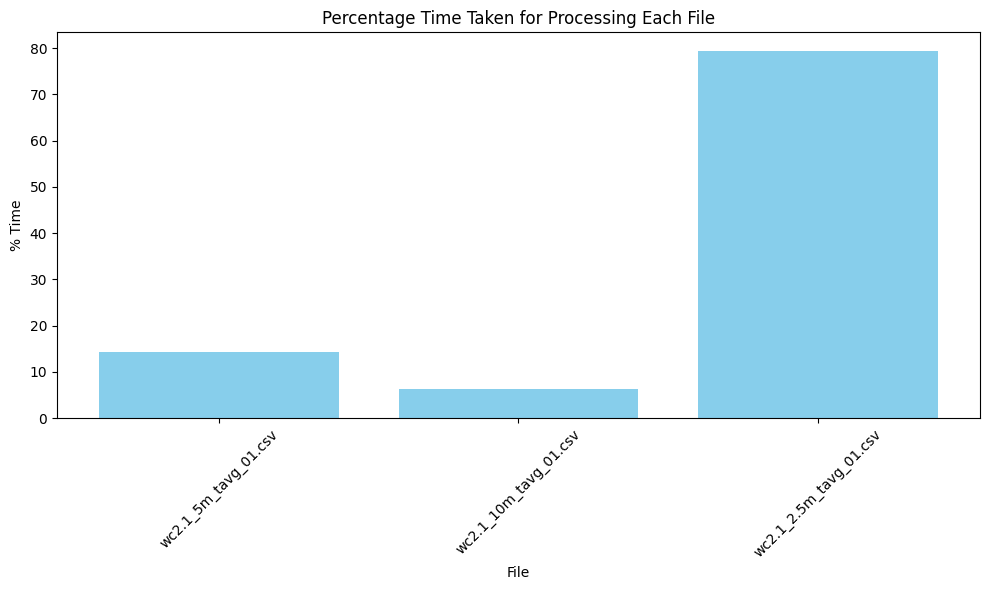

In [ ]:
#, "wc2.1_30s_tavg_01.csv"
arquivos = ["wc2.1_5m_tavg_01.csv", "wc2.1_10m_tavg_01.csv", "wc2.1_2.5m_tavg_01.csv"]
plot_time_percentage(arquivos)

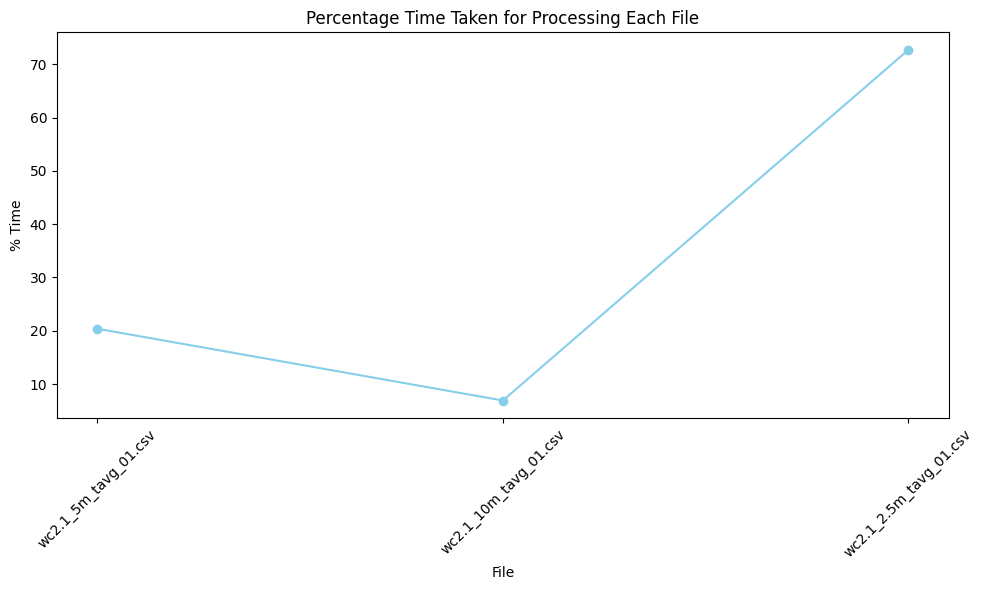

In [ ]:
plot_time_percentage2(arquivos)

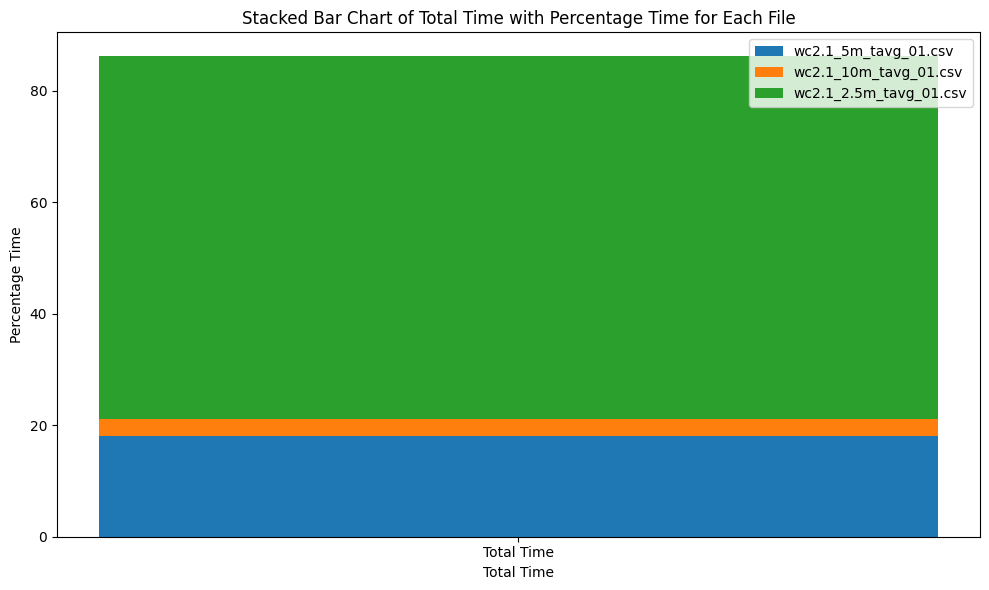

In [ ]:
plot_stacked_bar(arquivos)

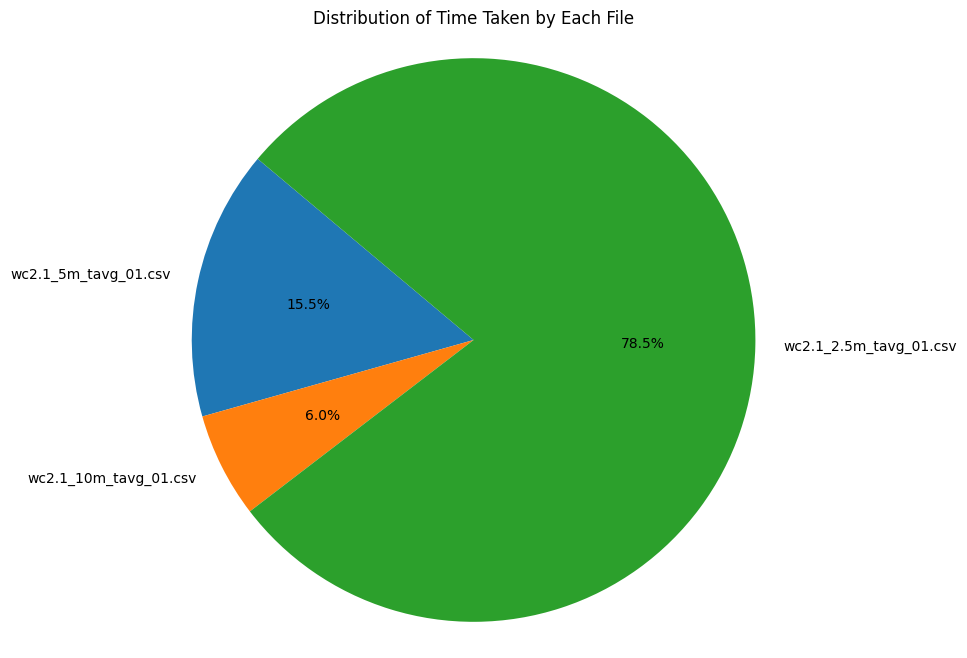

In [ ]:
plot_pie_chart(arquivos)